# Decoding the U.S. Electricity Market: Unraveling Dynamics through Data Exploration, Predictive Modeling, and Time Series Forecasting

### Data Transformation and Cleaning

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Load and transform the Dataset

In [3]:
# Read the extracted JSON file into a Pandas DataFrame
data_eia = pd.read_json("----------path_to_your_scraped_json_data-------")

# Flatten the nested JSON structure using json_normalize
x = pd.json_normalize(data_eia['response'])
x = pd.json_normalize(x['data'])

# Transpose the DataFrame for easier handling of nested structures
df = x.T

# Create an empty list to store individual DataFrames
dfs = []

# Loop through columns in the transposed DataFrame
for i in range(df.shape[1]-1, -1, -1):
    # Flatten each nested JSON structure within the column
    x_df = pd.json_normalize(df[i])
    # Append the flattened DataFrame to the list
    dfs.append(x_df)

# Concatenate the list of DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs, ignore_index=True)

# Save the concatenated DataFrame as a CSV file
concatenated_df.to_csv('electricity_retailSales_data_2010-23.csv', index=False)

This code reads a JSON file, flattens the nested structures using json_normalize, transposes the DataFrame for easier handling, and then concatenates the individual DataFrames into a single DataFrame. Finally, it saves the resulting DataFrame as a CSV file.

### Data PreProcessing

In [8]:
df = pd.read_csv('/Users/zaid/Desktop/Study/EIA Project/electricity_retailSales_data_2010-23.csv')

# Drop the null values
filtered_df = df.dropna()

# Round the numerical values to 2 decimal places
filtered_df = round(filtered_df,2)

# Converting the customers column in thousands
filtered_df['customers']  = filtered_df['customers'].apply(lambda x:round(x/1000,2))
filtered_df['customers-units'] = filtered_df['customers-units'].apply(lambda x:"number of customers in thousands" if x == 'number of customers' else 'number of customers')

filtered_df.head()

,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2023-08,NM,New Mexico,COM,commercial,146.67,11.34,107.93,951.39,number of customers in thousands,cents per kilowatthour,million dollars,million kilowatthours
1,2023-08,SC,South Carolina,IND,industrial,3.65,7.11,164.46,2311.44,number of customers in thousands,cents per kilowatthour,million dollars,million kilowatthours
2,2023-08,NEW,New England,IND,industrial,21.64,15.70,206.81,1317.47,number of customers in thousands,cents per kilowatthour,million dollars,million kilowatthours
3,2023-08,NEW,New England,COM,commercial,945.66,18.98,847.56,4465.05,number of customers in thousands,cents per kilowatthour,million dollars,million kilowatthours
4,2023-08,NEW,New England,ALL,all sectors,7546.86,22.18,2328.06,10494.39,number of customers in thousands,cents per kilowatthour,million dollars,million kilowatthours


### Exploratory Data Analysis

In [9]:
# Display information about the concatenated DataFrame
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58032 entries, 0 to 58031
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   period            58032 non-null  object 
 1   stateid           58032 non-null  object 
 2   stateDescription  58032 non-null  object 
 3   sectorid          58032 non-null  object 
 4   sectorName        58032 non-null  object 
 5   customers         48360 non-null  float64
 6   price             48360 non-null  float64
 7   revenue           48360 non-null  float64
 8   sales             48360 non-null  float64
 9   customers-units   58032 non-null  object 
 10  price-units       58032 non-null  object 
 11  revenue-units     58032 non-null  object 
 12  sales-units       58032 non-null  object 
dtypes: float64(4), object(9)
memory usage: 5.8+ MB


In [10]:
# Check for null values
concatenated_df.isna().sum()

period                 0
stateid                0
stateDescription       0
sectorid               0
sectorName             0
customers           9672
price               9672
revenue             9672
sales               9672
customers-units        0
price-units            0
revenue-units          0
sales-units            0
dtype: int64

#### How is the number of customers, revenue earned and sales distributed over the sectors?

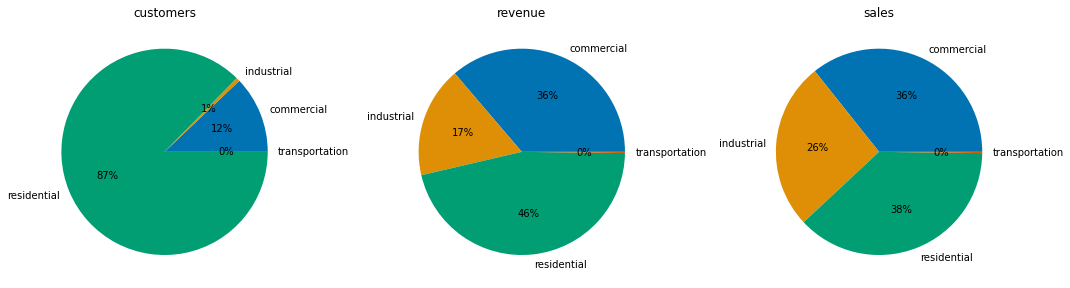

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

# Prepare the data for creating a pie diagram 
pie_diagram_data = filtered_df.loc[(filtered_df['sectorName'] != 'all sectors') & (filtered_df['stateDescription'] != 'U.S. Total')].groupby(['sectorName']).agg({'customers':'sum', 'revenue':'sum','sales':'sum'})

# Define colors and labels
colors = sns.color_palette('colorblind')
labels = pie_diagram_data.keys()

# Create a figure with a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

# Loop through the data and create pie charts in subplots
for i, (sector, values) in enumerate(pie_diagram_data.items()):
    axes[i].pie(values, labels=pie_diagram_data.index, colors=colors, autopct='%.0f%%')
    axes[i].set_title(sector)

# Adjust spacing between subplots
plt.tight_layout()

# Display the pie chart subplots
plt.show()

**Residential Dominance (Customer Share: 87%):**
- The residential sector boasts the largest customer base, with approximately 87% of the total customers.
- It leads in revenue generation, contributing about 36% of the total revenue.
- Total sales in the residential sector account for approximately 38% of the overall sales.
- Conclusively, the residential sector has the largest customer base, generating the highest revenue and total sales, despite having the **highest average price per unit**. This sector plays a central role in the business.

**Commercial Significance (Customer Share: 12%):**
- The commercial sector, with around 12% of the total customers, still plays a vital role.
- It contributes significantly to revenue, accounting for about 36% of the total revenue.
- Total sales in the commercial sector represent approximately 36% of the overall sales.
- Conclusively, the commercial sector, with a substantial customer base, contributes significantly to revenue and total sales. It's an essential economic driver.

**Industrial Prowess (Customer Share: 1%):**
- Despite a smaller customer base (about 1% of the total customers), the industrial sector has a notable impact.
- It contributes substantially to revenue, representing approximately 17% of the total revenue.
- Total sales in the industrial sector make up approximately 26% of the overall sales.
- Conclusively, the industrial sector, though smaller in customer base, still contributes substantially to revenue and total sales, indicating its economic importance.

**Transportation's Minor Role (Customer Share: <0.01%):**
- The transportation sector has the smallest presence with less than 0.01% of the total customers.
- It generates the least revenue, accounting for less than 1% of the total revenue.
- Total sales in the transportation sector make up less than 1% of the overall sales.

These insights highlight the significant variation in customer distribution, revenue generation, and sales across sectors, underlining the dominance of the residential sector and the varying degrees of importance of the other sectors in the dataset.


#### What is the mean price per unit for each sector?

In [12]:
mean_price_per_sector = filtered_df.loc[(filtered_df['sectorName'] != 'all sectors') & (filtered_df['stateDescription'] != 'U.S. Total')].groupby(['sectorName']).agg({'price':'mean'})

In [13]:
mean_price_per_sector

,price
sectorName,
commercial,11.384471
industrial,8.332503
residential,13.844126
transportation,5.829817


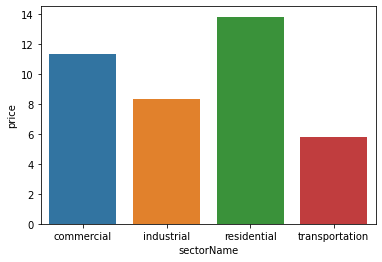

In [14]:
sns.barplot(x = mean_price_per_sector.index, y = mean_price_per_sector.price)

**Interesting Insight:** 

It can be observed that even though the residential sector constitutes for the highest number of customers, revenue and sales generated, it also is charged the highest average price per unit all over the states that is 13.84 cents per kilowatthour. If observed carefully, the commercial sector has a sales of 36% which is 2% less in comparison to residential sales (38% sales) which means that it would generate similar revenue as that from residential sector only if the prices woud have been similar but there is a differenec of aroud 2 cents per kilowatthour whih is cummilatively substantial.

### Playing around with the dates (Time Series)

In [15]:
# Converting the period column in datetime format:

filtered_df['period'] = pd.to_datetime(filtered_df['period'])

#### How have the sales, price and revenue varied over time?

1. Months

In [16]:
monthly_avg = filtered_df.groupby(filtered_df.period.dt.month).mean()

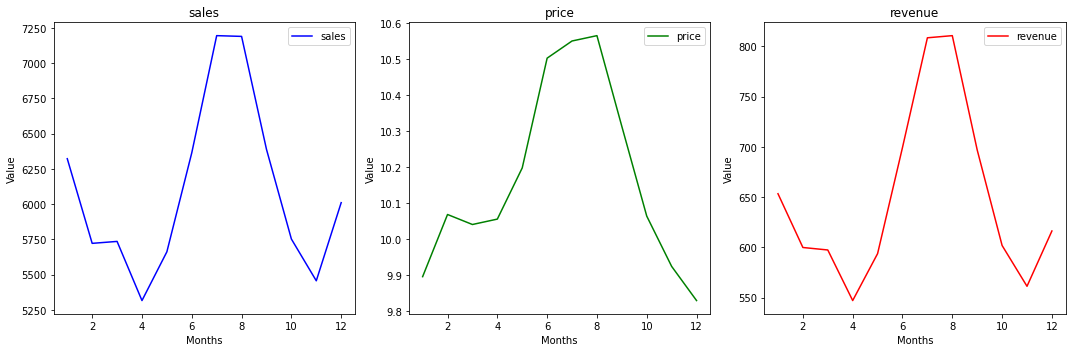

In [17]:
# Create subplots for each column 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Columns to plot 
columns_to_plot = ['sales', 'price', 'revenue']

# Define a list of colors for the lines
colors = ['b', 'g', 'r']

# Plot each selected column with a different color in a separate subplot
for i, (column, color) in enumerate(zip(columns_to_plot, colors)):
    axes[i].plot(monthly_avg.index, monthly_avg[column], linestyle='-', label=column, color=color)
    axes[i].set_title(column)
    axes[i].set_xlabel('Months')
    axes[i].set_ylabel('Value')


# Add a legend to differentiate the lines
for ax in axes:
    ax.legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

2. Years

In [18]:
yearly_avg = filtered_df.set_index(['period']).to_period("Y").groupby('period').mean()

In [19]:
# Convert the PeriodIndex to datetime
yearly_avg.index = yearly_avg.index.to_timestamp()

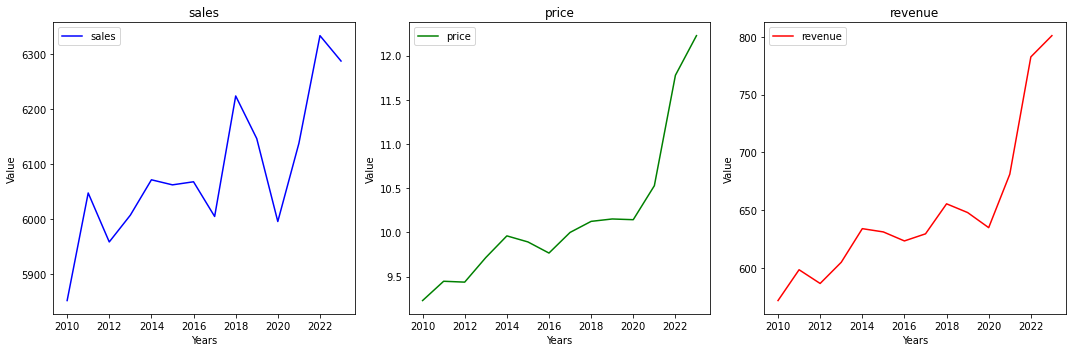

In [20]:
# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Columns to plot
columns_to_plot = ['sales', 'price', 'revenue']

# Define a list of colors for the lines
colors = ['b', 'g', 'r']

# Plot each selected column with a different color in a separate subplot
for i, (column, color) in enumerate(zip(columns_to_plot, colors)):
    axes[i].plot(yearly_avg.index, yearly_avg[column], linestyle='-', label=column, color=color)
    axes[i].set_title(column)
    axes[i].set_xlabel('Years')
    axes[i].set_ylabel('Value')


# Add a legend to differentiate the lines
for ax in axes:
    ax.legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

#### How have the prices per unit varied over the years w.r.t sectors?

In [21]:
price_by_sector = filtered_df.loc[(filtered_df['sectorName'] != 'all sectors') & (filtered_df['stateDescription'] != 'U.S. Total')].groupby([filtered_df.period.dt.year, filtered_df.sectorName]).agg({'price':'mean'})

# Melt the DataFrame to create separate columns for each sector's price
melted_df = pd.pivot_table(price_by_sector, index='period', columns='sectorName', values='price', aggfunc='first').reset_index()

# Rename the columns to include the '_price' suffix
melted_df.columns = ['period'] + [f'{sector}_price' for sector in melted_df.columns[1:]]

In [22]:
melted_df

,period,commercial_price,industrial_price,residential_price,transportation_price
0,2010,10.336557,7.752418,12.132664,5.653566
1,2011,10.603019,7.967801,12.419372,5.695410
2,2012,10.595410,7.904891,12.631257,5.473415
3,2013,10.835546,8.077555,12.890041,5.947773
4,2014,11.268730,8.342281,13.371776,5.604686
5,2015,11.112473,8.079440,13.464044,5.685929
6,2016,10.941885,7.897227,13.391776,5.620328
7,2017,11.221120,8.105396,13.758005,5.665697
8,2018,11.358702,8.288634,13.900410,5.646489
9,2019,11.413197,8.207172,14.048128,5.625027


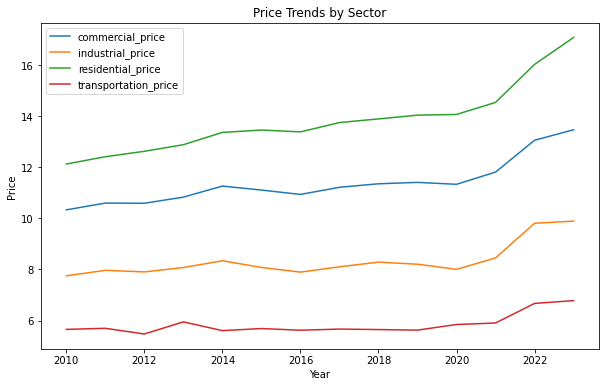

In [23]:

# Plot multiline line chart
plt.figure(figsize=(10, 6))
for column in melted_df.columns[1:]:
    plt.plot(melted_df['period'], melted_df[column], label=column)

plt.title('Price Trends by Sector')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

plt.show()

### HeatMaps

#### Which states have the highest revenue generated from Electricity Supply 2013-2023 ?

In [24]:
us_state_abbreviations = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

In [25]:
total_byStates = filtered_df.loc[(filtered_df['sectorName'] != 'all sectors') & (filtered_df['stateDescription'] != 'U.S. Total') & (filtered_df['stateid'].isin(us_state_abbreviations))].groupby(['stateid']).sum()

In [26]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=total_byStates.index, # Spatial coordinates
    z = total_byStates['revenue'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = 'Revenue generated from Electricity Supply 2013-2023',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


In [27]:
total_bySector_byStates = filtered_df.loc[(filtered_df['sectorName'] != 'all sectors') & (filtered_df['stateDescription'] != 'U.S. Total') & (filtered_df['stateid'].isin(us_state_abbreviations))].groupby(['stateid','sectorName']).sum()

In [28]:
total_bySector_byStates

customers    price   revenue      sales
stateid sectorName                                             
AK      commercial        8303.86  2794.81   6260.80   35131.67
        industrial         195.23  2551.41   2868.14   17542.45
        residential      44725.22  3234.78   5512.98   26760.28
        transportation       0.00     0.00      0.00       0.00
AL      commercial       57301.73  1768.38  33370.32  294185.23
...                           ...      ...       ...        ...
WV      transportation       0.00   350.63      1.21      13.98
WY      commercial        9101.41  1425.65   4515.72   49747.25
        industrial        1663.25  1024.56   8567.67  130609.04
        residential      42191.12  1688.28   3930.47   36617.96
        transportation       0.00     0.00      0.00       0.00

[200 rows x 4 columns]

In [29]:
# Melt the DataFrame to create separate columns for each sector's price
sd = pd.pivot_table(total_bySector_byStates, index='stateid', columns='sectorName', values=['customers','price','revenue','sales'], aggfunc='first').reset_index()

# Rename the columns in the desired format
sd.columns = ['stateid'] + [f'{sector}_{variable}' for sector, variable in sd.columns[1:]]

In [30]:
sd.head()

,stateid,customers_commercial,customers_industrial,customers_residential,customers_transportation,price_commercial,price_industrial,price_residential,price_transportation,revenue_commercial,revenue_industrial,revenue_residential,revenue_transportation,sales_commercial,sales_industrial,sales_residential,sales_transportation
0,AK,8303.86,195.23,44725.22,0.00,2794.81,2551.41,3234.78,0.00,6260.80,2868.14,5512.98,0.00,35131.67,17542.45,26760.28,0.00
1,AL,57301.73,1132.42,346885.06,0.00,1768.38,975.83,1913.33,0.00,33370.32,26801.68,50974.27,0.00,294185.23,428010.46,415923.39,0.00
2,AR,29962.61,5516.68,215367.22,0.00,1324.56,954.60,1582.65,1908.19,13165.08,13705.70,24270.05,0.13,154961.89,222965.55,239065.67,4.75
3,AZ,50014.29,1201.27,432328.91,0.00,1587.27,1028.23,1885.76,997.16,39852.20,11859.49,55515.66,7.57,388030.27,179208.23,453663.90,78.98
4,CA,270744.10,21173.18,2107816.89,1.58,2553.21,2010.18,2948.24,1489.61,247924.09,83072.29,220299.71,931.61,1509825.33,640943.71,1162567.98,9828.44


In [57]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=sd['stateid'], # Spatial coordinates
    z = sd['revenue_commercial'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = 'Commercial Revenue generated from Electricity Supply 2013-2023',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

rows = 2
cols = 2
fig = make_subplots(
    rows=rows, cols=cols,
    specs=[[{'type': 'choropleth'} for c in np.arange(cols)] for r in np.arange(rows)],
    subplot_titles=['Commercial', 'Industrial', 'Residential', 'Transportation']
)

# Assuming you want to create multiple choropleth maps with 'sd' data
for i in range(4):
    fig.add_trace(go.Choropleth(
        locations=sd['stateid'],
        z=sd.iloc[:,sd.columns.get_loc('revenue_commercial')+i].astype(float),
        locationmode='USA-states',
        colorscale='Reds',
        colorbar_title="Millions USD",
    ), row=i // cols + 1, col=i % cols + 1)

fig.update_layout(
    title_text='Revenue generated from Electricity Supply 2013-2023',
    **{'geo' + str(i) + '_scope': 'usa' for i in [''] + np.arange(2, rows * cols + 1).tolist()},
)

for index, trace in enumerate(fig.data):
    fig.data[index].hovertemplate = 'State: %{location}<br>Revenue: %{z:.2f}<extra></extra>'

fig.show()

### Prediction Models:

In [33]:
filtered_df.head()

,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2023-08-01,NM,New Mexico,COM,commercial,146.67,11.34,107.93,951.39,number of customers in thousands,cents per kilowatthour,million dollars,million kilowatthours
1,2023-08-01,SC,South Carolina,IND,industrial,3.65,7.11,164.46,2311.44,number of customers in thousands,cents per kilowatthour,million dollars,million kilowatthours
2,2023-08-01,NEW,New England,IND,industrial,21.64,15.70,206.81,1317.47,number of customers in thousands,cents per kilowatthour,million dollars,million kilowatthours
3,2023-08-01,NEW,New England,COM,commercial,945.66,18.98,847.56,4465.05,number of customers in thousands,cents per kilowatthour,million dollars,million kilowatthours
4,2023-08-01,NEW,New England,ALL,all sectors,7546.86,22.18,2328.06,10494.39,number of customers in thousands,cents per kilowatthour,million dollars,million kilowatthours


In [34]:
filtered_df.columns

Index(['period', 'stateid', 'stateDescription', 'sectorid', 'sectorName',
       'customers', 'price', 'revenue', 'sales', 'customers-units',
       'price-units', 'revenue-units', 'sales-units'],
      dtype='object')

In [35]:
model_data = filtered_df.drop(['sales', 'revenue', 'sectorName','customers-units', 'price-units', 'revenue-units', 'sales-units'], axis=1)

model_data.head()

,period,stateid,stateDescription,sectorid,customers,price
0,2023-08-01,NM,New Mexico,COM,146.67,11.34
1,2023-08-01,SC,South Carolina,IND,3.65,7.11
2,2023-08-01,NEW,New England,IND,21.64,15.70
3,2023-08-01,NEW,New England,COM,945.66,18.98
4,2023-08-01,NEW,New England,ALL,7546.86,22.18


In [36]:
# List of State Names
stateDescription_list = list(model_data.stateDescription.value_counts().index.sort_values())

# Create a mapping dictionary for state names with numbers
states_dict = {}

for index, element in enumerate(stateDescription_list):
    states_dict[element] = index

# Add a column 'stateDescription_mapping' to the model_data dataframe
model_data['stateDescription_mapping'] = model_data['stateDescription'].apply(lambda x: states_dict.get(x))

# Splitting the categorical variable column sectorid into dummmy columns
model_data = pd.get_dummies(model_data , columns=['sectorid'])

# Separating the Year and Month into separate columns for better training 
model_data['Year'] = model_data['period'].dt.year
model_data['Month'] = model_data['period'].dt.month

model_data.head()

,period,stateid,stateDescription,customers,price,stateDescription_mapping,sectorid_ALL,sectorid_COM,sectorid_IND,sectorid_RES,sectorid_TRA,Year,Month
0,2023-08-01,NM,New Mexico,146.67,11.34,36,0,1,0,0,0,2023,8
1,2023-08-01,SC,South Carolina,3.65,7.11,48,0,0,1,0,0,2023,8
2,2023-08-01,NEW,New England,21.64,15.70,33,0,0,1,0,0,2023,8
3,2023-08-01,NEW,New England,945.66,18.98,33,0,1,0,0,0,2023,8
4,2023-08-01,NEW,New England,7546.86,22.18,33,1,0,0,0,0,2023,8


### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Defining the features and target variable

X = model_data[['customers',
       'stateDescription_mapping', 'sectorid_ALL', 'sectorid_COM',
       'sectorid_IND', 'sectorid_RES', 'sectorid_TRA', 'Year', 'Month']]
y = model_data['price']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Training the model
reg = LinearRegression().fit(X_train, y_train)

# Making predictions
y_pred = reg.predict(X_test)

In [39]:
#Concatenating the Predicted values and actual values in one dataframe.

lr_op = pd.DataFrame({'Actual value': y_test, 'Predicted value using Linear Regression': y_pred})
lr_op.head(10)

,Actual value,Predicted value using Linear Regression
44505,0.00,5.958204
41269,10.80,6.180739
40975,7.81,7.000577
37855,10.48,10.309995
31358,10.39,10.557496
40186,9.51,10.368703
5979,12.58,12.420388
21816,7.13,12.423982
18780,17.54,13.590779
37060,0.00,5.213869


#### Evaluate the model:

In [40]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# mse and mae
mse_linearRegression = mean_squared_error(y_test, y_pred)
mae_linearRegression = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error for Linear Regression: {mse_linearRegression}')
print(f'Mean Absolute Error for Linear Regression: {mae_linearRegression}')

#R2 score (i.e accuracy) of prediction
r2_sscore_linearRegression = r2_score(y_test, y_pred)
print('R2 SCORE for Linear Regression: ',r2_sscore_linearRegression*100,'%')

Mean Squared Error for Linear Regression: 20.802806335818467
Mean Absolute Error for Linear Regression: 3.264939176284788
R2 SCORE for Linear Regression:  28.72183063416808 %


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

#### Feature Importance

In [42]:
print(rf_model.feature_importances_)

[4.04909539e-01 4.75443387e-01 8.87377288e-04 2.69239441e-03
 1.07481347e-02 3.46062651e-02 1.05347387e-04 5.96971948e-02
 1.09103601e-02]


### Model Evaluation

In [43]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error for Random Forest: {mse_rf}')
print(f'Mean Absolute Error for Random Forest: {mae_rf}')

r2_s_rf = r2_score(y_test, y_pred)
print('R2 SCORE for Random Forest: ',round(r2_s_rf*100,2),'%')

Mean Squared Error for Random Forest: 0.3193132651147645
Mean Absolute Error for Random Forest: 0.29718859594706365
R2 SCORE for Random Forest:  98.91 %


Feature importances represent the contribution of each feature to the model's predictions. Here's how to interpret them:

    1. Customers (0.4049):
        This feature has the highest importance, suggesting that it has a significant impact on the model's predictions. Higher values of "Customers" likely correspond to higher predicted prices.

    2. State Description Mapping (0.4754):
        The second most important feature. It indicates that the mapping of state descriptions contributes significantly to the model's predictions.

    3. Sector ID ALL (0.0009):
        This feature has a very low importance, suggesting that it doesn't contribute much to the model's predictions.

    4. Sector ID COM (0.0027):
        Similar to "Sector ID ALL," this feature has relatively low importance.

    5. Sector ID IND (0.0107):
        Higher importance than "Sector ID ALL" and "Sector ID COM," but still lower than the top features.

    6. Sector ID RES (0.0346):
        This feature has higher importance, suggesting it has a more substantial impact on predictions.

    7. Sector ID TRA (0.0001):
        Very low importance, indicating minimal contribution.

    8. Year (0.0597):
        This feature has relatively high importance, suggesting that the year plays a significant role in predicting prices.

    9. Month (0.0109):
        While not as influential as some other features, the month also contributes to the model's predictions.

In summary, the feature importances provide insights into which features are most influential in your Random Forest Regressor model. Features with higher importances have a more substantial impact on predictions. It's essential to interpret these results in the context of your specific problem and dataset. Consider how these features align with your domain knowledge and whether the results make sense given the nature of the data.

In [44]:
#Concatenating the Predicted values and actual values in one dataframe.

rf_op = pd.DataFrame({'Actual value': y_test, 'Predicted value using Random Forest': y_pred})
rf_op.head(10)

,Actual value,Predicted value using Random Forest
44505,0.00,0.0000
41269,10.80,10.4820
40975,7.81,7.7161
37855,10.48,10.4566
31358,10.39,10.2808
40186,9.51,9.5167
5979,12.58,12.5198
21816,7.13,7.7501
18780,17.54,17.6925
37060,0.00,0.0000


In [46]:
from sklearn.model_selection import cross_val_score

# Code for Cross-Validation
cv_accuracy_lr = cross_val_score(reg, X, y, cv=5, scoring='r2')
cv_accuracy_rf = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print(f'\nCross-Validation Accuracy for Linear Regression Model: {cv_accuracy_lr.mean()*100:.2f}')
print(f'\nCross-Validation Accuracy for Random Forest Model: {cv_accuracy_rf.mean()*100:.2f}')


Cross-Validation Accuracy for Linear Regression Model: 27.01

Cross-Validation Accuracy for Random Forest Model: 92.39


### Time Series Forecasting

In [47]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

In [48]:
s = filtered_df.groupby(['stateDescription','sectorid','period']).mean()
sdf = pd.DataFrame(s)

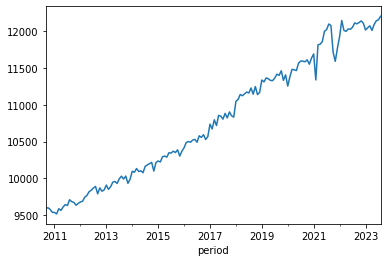

In [49]:
sdf.loc['Texas','RES']['customers'].plot()

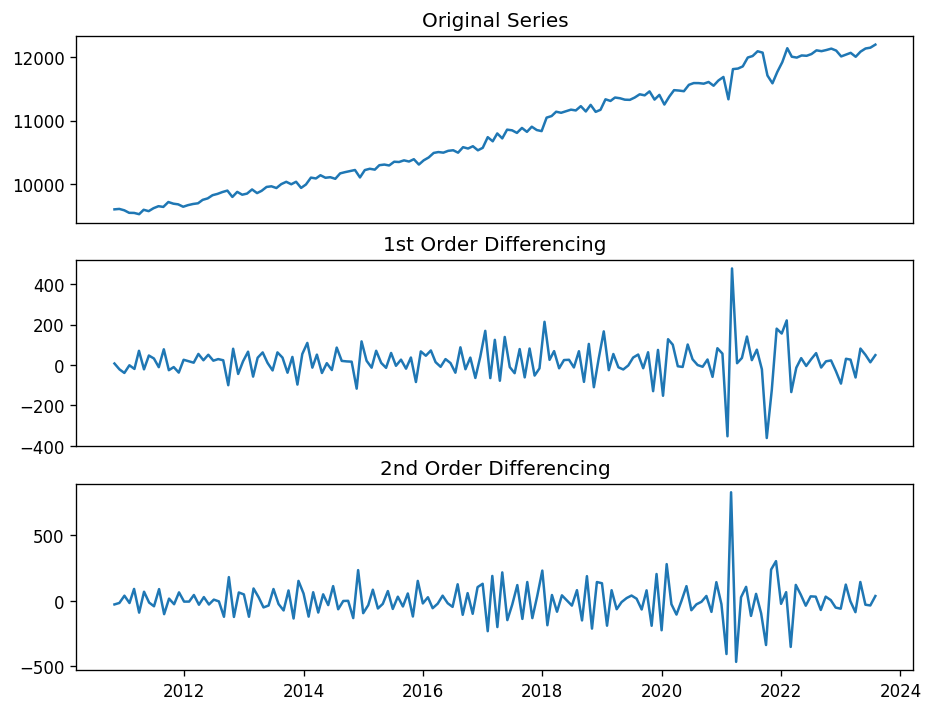

In [50]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(sdf.loc['Texas','RES']['customers']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(sdf.loc['Texas','RES']['customers'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(sdf.loc['Texas','RES']['customers'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()


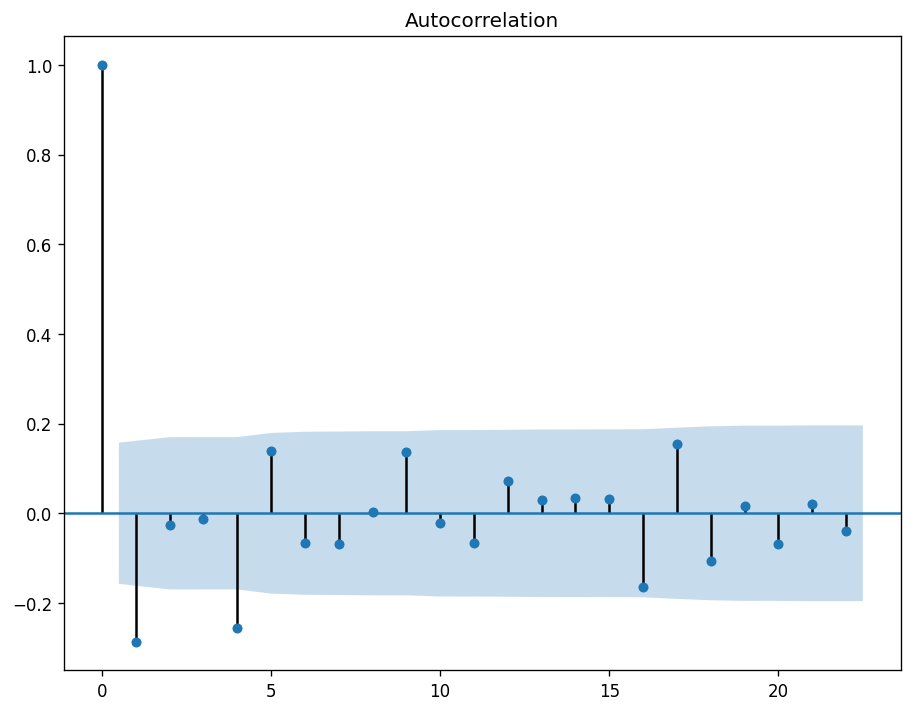

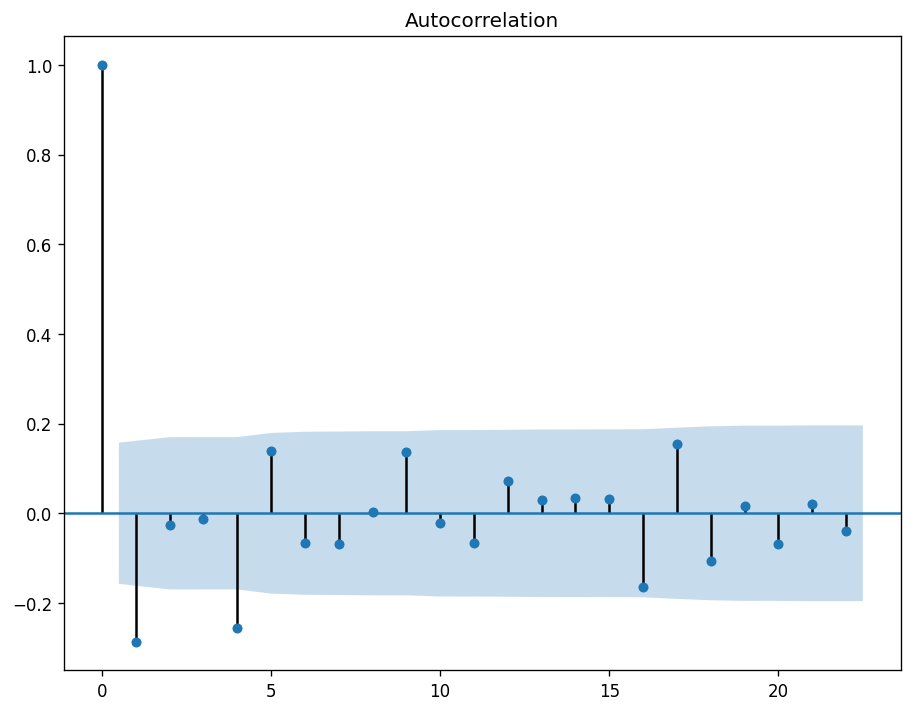

In [51]:
plot_acf(sdf.loc['Texas','RES']['customers'].diff().dropna())

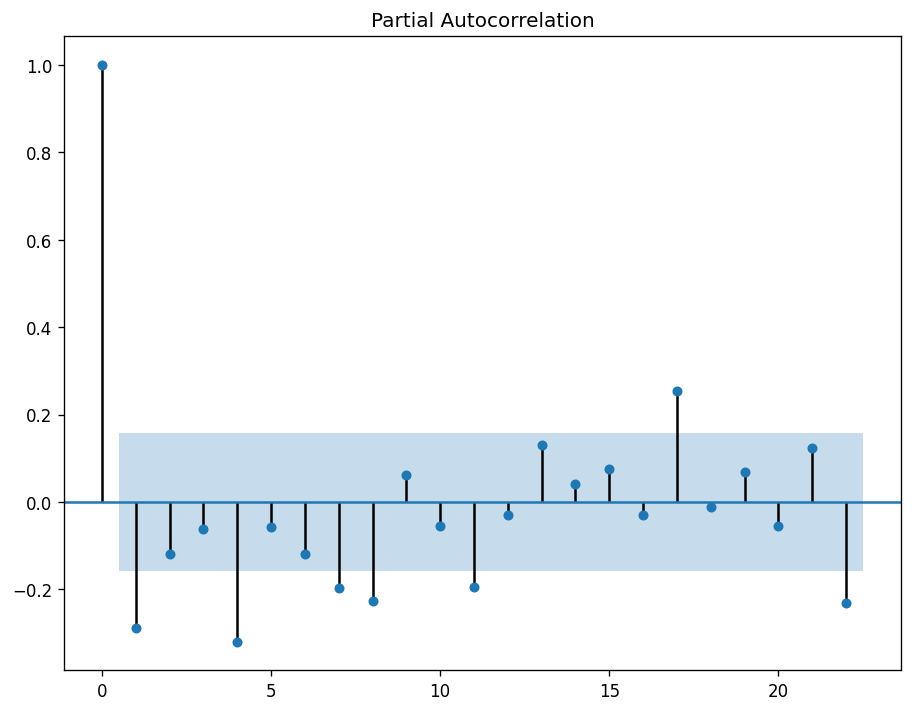

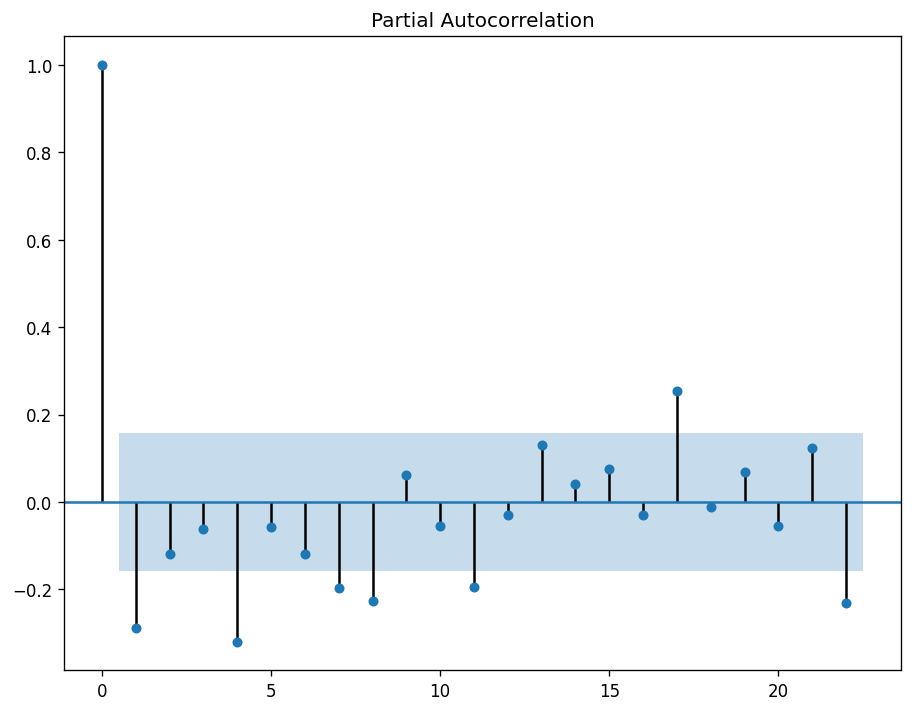

In [52]:
plot_pacf(sdf.loc['Texas','RES']['customers'].diff().dropna())

In [53]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(sdf.loc['Texas','RES']['customers'], order = (4,1,2))
model_fit = model.fit(disp=0)
model_fit.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.customers   No. Observations:                  155
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -889.677
Method:                       css-mle   S.D. of innovations             75.030
Date:                Fri, 01 Dec 2023   AIC                           1795.355
Time:                        22:33:16   BIC                           1819.702
Sample:                    10-01-2010   HQIC                          1805.244
                         - 08-01-2023                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                17.2003      1.584     10.858      0.000      14.095      20.305
ar.L1.D.customers    -0.1462      0.284     -0.514      0.607      -0.703       0.411
ar.L2.D.customers     0.2298      0.163      1.413      0.158      -0.089       0.549
ar.L3.D.customers    -0.0329      0.088     -0.375      0.708      -0.205       0.139
ar.L4.D.customers    -0.2658      0.083     -3.219      0.001      -0.428      -0.104
ma.L1.D.customers    -0.2778      0.295     -0.940      0.347      -0.857       0.301
ma.L2.D.customers    -0.4137      0.267     -1.548      0.122      -0.937       0.110
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1207           -0.7835j            1.3675           -0.4029
AR.2           -1.1207           +0.7835j            1.3675            0.4029
AR.3            1.0588           -0.9439j            1.4185           -0.1159
AR.4            1.0588           +0.9439j            1.4185            0.1159
MA.1            1.2548           +0.0000j            1.2548            0.0000
MA.2           -1.9265           +0.0000j            1.9265            0.5000
-----------------------------------------------------------------------------
"""

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:342: FutureWarning:

The 'freq' argument in Timestamp is deprecated and will be removed in a future version.



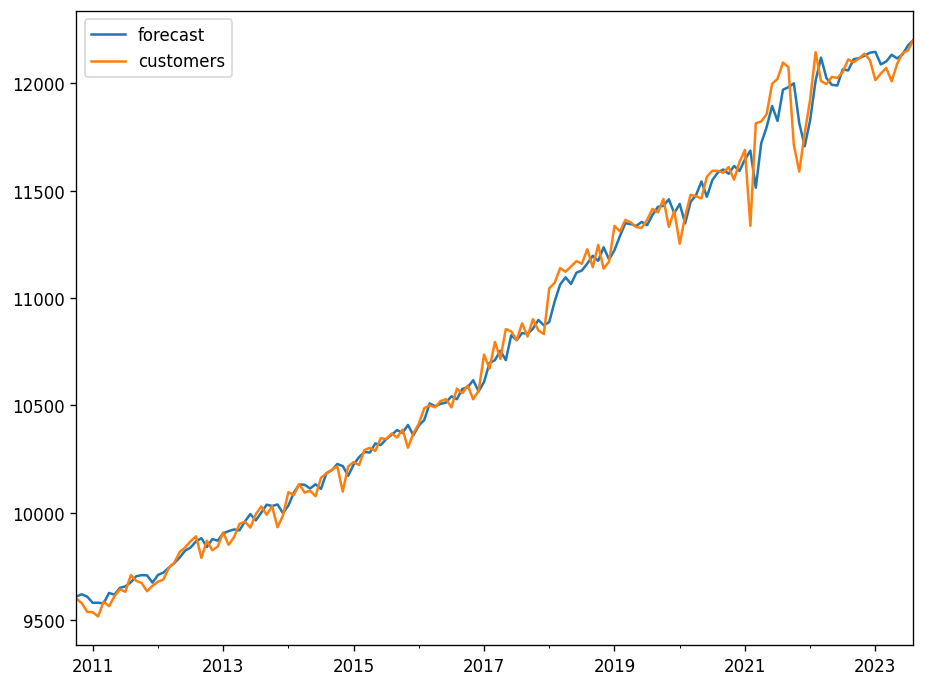

In [54]:
model_fit.plot_predict(dynamic=False)
plt.show()

#### Forecast the number of customers for the next year

In [55]:

start_index = '2023-09'
end_index = '2024-09'

forecast = model_fit.predict(start = start_index,end=end_index, dynamic=True, typ='levels')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:342: FutureWarning:

The 'freq' argument in Timestamp is deprecated and will be removed in a future version.



In [56]:
print(forecast)

2023-09-01    12205.249826
2023-10-01    12223.066071
2023-11-01    12237.017011
2023-12-01    12246.966657
2024-01-01    12268.196965
2024-02-01    12283.084967
2024-03-01    12302.651601
2024-04-01    12320.769094
2024-05-01    12337.384034
2024-06-01    12355.417383
2024-07-01    12371.702216
2024-08-01    12389.003229
2024-09-01    12406.106552
Freq: MS, dtype: float64
